In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import VAR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

%matplotlib inline

# This will allow us to avoid a FutureWarning when plotting.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

The below code was made to organize the crime data frames into time series ready data.

We also show a time series plot of each individual crime data set.

The process for each dataset is largely the same as the first.

In [2]:
#Import Health Crime Data
df_CZA = pd.read_csv('../data/CZA.csv')
df_CZB = pd.read_csv('../data/CZB.csv')  
df_CZH = pd.read_csv('../data/CZH.csv')
df_CZL = pd.read_csv('../data/CZL.csv') 
df_CZM = pd.read_csv('../data/CZM.csv') 
df_CZO = pd.read_csv('../data/CZO.csv')
df_CZP = pd.read_csv('../data/CZP.csv')
df_CZR = pd.read_csv('../data/CZR.csv')
df_CZS = pd.read_csv('../data/CZS.csv')
df_CZT = pd.read_csv('../data/CZT.csv')
df_CZU = pd.read_csv('../data/CZU.csv')
df_CZV = pd.read_csv('../data/CZV.csv') 

### CZA

In [3]:
#Getting Rid of P and SE Columns, not needed for TS
df_CZA = df_CZA.drop(columns=['p', 'se', 'a'])

In [4]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZA)):
    if len(df_CZA['d'][i]) > 4:
        df_CZA.drop(i, inplace=True)

In [5]:
df_CZA.reset_index(inplace=True)

In [6]:
#Looping to take the sum of each year that were multiples in the data
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZA)):
    if df_CZA['d'][i] == '2022':
        t_2022 += df_CZA['v'][i]
    elif df_CZA['d'][i] == '2021':
        t_2021 += df_CZA['v'][i]
    elif df_CZA['d'][i] == '2020':
        t_2020 += df_CZA['v'][i]
    elif df_CZA['d'][i] == '2019':
        t_2019 += df_CZA['v'][i]
    elif df_CZA['d'][i] == '2018':
        t_2018 += df_CZA['v'][i]
    elif df_CZA['d'][i] == '2017':
        t_2017 += df_CZA['v'][i]
    elif df_CZA['d'][i] == '2016':
        t_2016 += df_CZA['v'][i]

In [7]:
#Creates a dataframe specifically for TS analysis
cza_ts = pd.DataFrame()
cza_ts = df_CZA

In [8]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(cza_ts)):
    if cza_ts['d'][i] == '2022':
        cza_ts.drop(i, inplace=True)
    elif cza_ts['d'][i] == '2021':
        cza_ts.drop(i, inplace=True)
    elif cza_ts['d'][i] == '2020':
        cza_ts.drop(i, inplace=True)
    elif cza_ts['d'][i] == '2019':
        cza_ts.drop(i, inplace=True)
    elif cza_ts['d'][i] == '2018':
        cza_ts.drop(i, inplace=True)
    elif cza_ts['d'][i] == '2017':
        cza_ts.drop(i, inplace=True)
    elif cza_ts['d'][i] == '2016':
        cza_ts.drop(i, inplace=True)

In [9]:
cza_ts.head()

,index,g,l,d,v
5731,9613,1714000,place,2015,13094.0
5732,10550,1714000,place,2014,12532.0
5733,11487,1714000,place,2013,12117.0
5734,12424,1714000,place,2012,12277.0
5735,13361,1714000,place,2011,12409.0


In [10]:
df_CZA['d'].value_counts()

2015    1
1999    1
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    1
1996    1
1997    1
1998    1
2000    1
2014    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
2010    1
2011    1
2012    1
2013    1
1985    1
Name: d, dtype: int64

In [11]:
#Dropping additional columns I later realized we did not need
cza_ts.drop(columns=['index', 'g', 'l'], inplace=True)

In [12]:
cza_ts.head()

,d,v
5731,2015,13094.0
5732,2014,12532.0
5733,2013,12117.0
5734,2012,12277.0
5735,2011,12409.0


In [13]:
#Creating a dictionary for each year where the data was a sum of multiple rows
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [14]:
#Appending those dictionaries as rows for the years
cza_ts = cza_ts.append(row_2016, ignore_index=True)
cza_ts = cza_ts.append(row_2017, ignore_index=True)
cza_ts = cza_ts.append(row_2018, ignore_index=True)
cza_ts = cza_ts.append(row_2019, ignore_index=True)
cza_ts = cza_ts.append(row_2020, ignore_index=True)
cza_ts = cza_ts.append(row_2021, ignore_index=True)
cza_ts = cza_ts.append(row_2022, ignore_index=True)

/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/1562274710.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cza_ts = cza_ts.append(row_2016, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/1562274710.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cza_ts = cza_ts.append(row_2017, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/1562274710.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cza_ts = cza_ts.append(row_2018, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/1562274710.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [15]:
#Convert date to datetime, preparing for TS analysis
cza_ts['d'] = pd.to_datetime(cza_ts['d'])

In [16]:
cza_ts.set_index('d', inplace = True)

In [17]:
cza_ts.sort_index(inplace=True)
cza_ts.head()

,v
d,
1985-01-01,29104.0
1986-01-01,33537.0
1987-01-01,34180.0
1988-01-01,35994.0
1989-01-01,37621.0


In [18]:
#Renaming column for clarity
cza_ts['v_a'] = cza_ts['v']
cza_ts.drop(columns='v', inplace=True)

In [19]:
# Function called plot_series that takes in 
# a dataframe, a list of column names to plot, the 
# plot title and the axis labels as arguments,
# then displays the line plot with a figure size
# of 18 horizontal inches by 9 vertical inches.

# Matthew Garton - BOS, taken from DSI-GA Time Series Lecture

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
        
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);

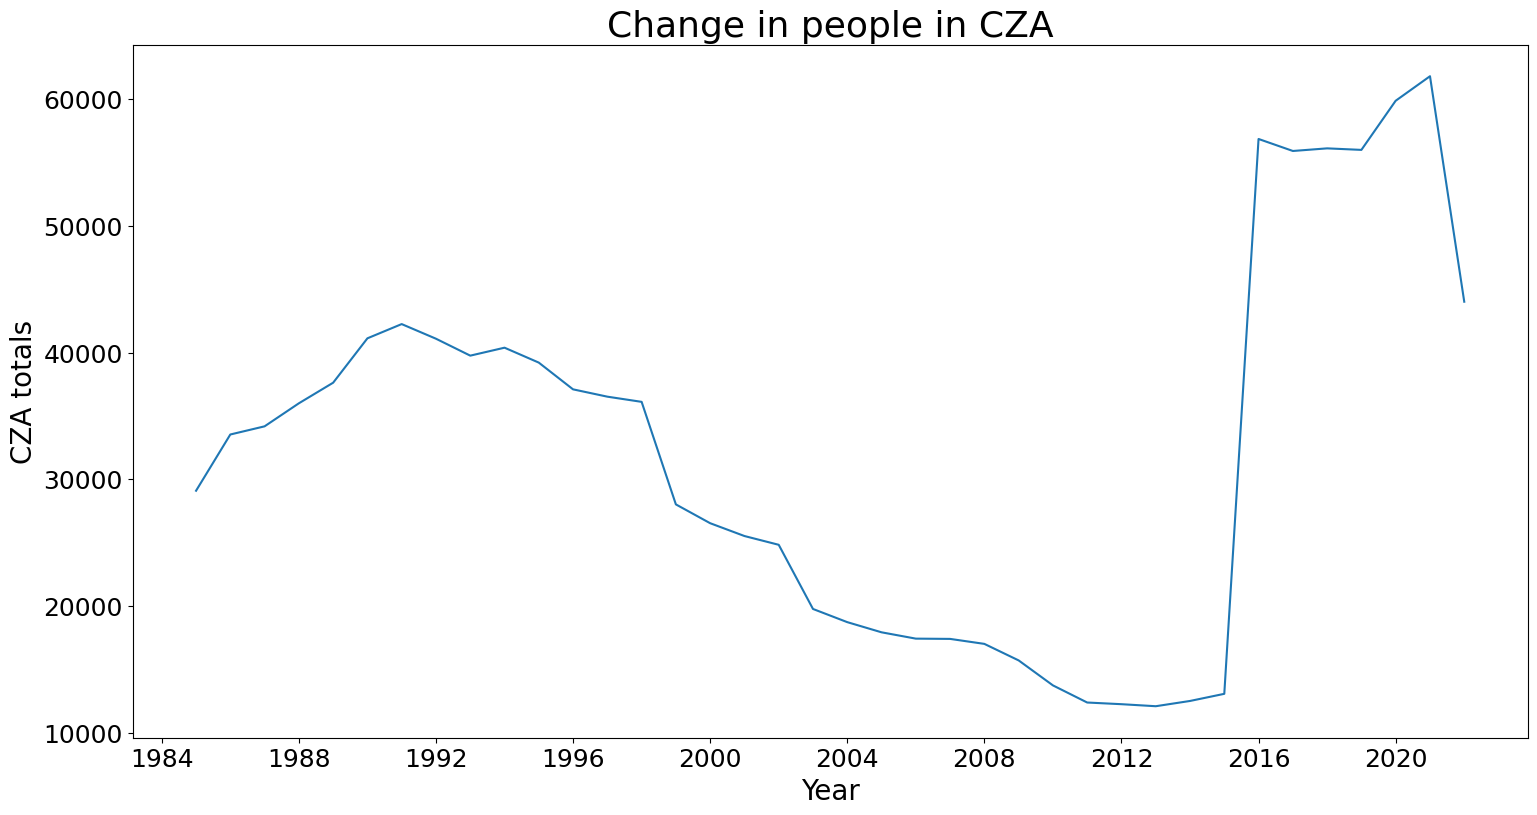

In [157]:
plot_series(cza_ts, cols=['v_a'], title = 'Change in people in CZA', xlab = 'Year', ylab = 'CZA totals') 

### CZB

In [164]:
#Process from above was largely followed below

df_CZB.head()

,index,d,v
5726,9608,2015,13170.0
5727,10545,2014,14560.0
5728,11482,2013,17881.0
5729,12419,2012,22757.0
5730,13356,2011,26427.0


In [22]:
df_CZB = df_CZB.drop(columns=['p', 'se', 'g', 'l', 'a'])

In [23]:
df_CZB.head()

,d,v
0,2018-2022,34.320927
1,2018-2022,5.314324
2,2018-2022,6.323168
3,2018-2022,4.485415
4,2018-2022,16.307285


In [24]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZB)):
    if len(df_CZB['d'][i]) > 4:
        df_CZB.drop(i, inplace=True)

In [25]:
df_CZB.reset_index(inplace=True)

In [26]:
df_CZB['d'].value_counts()

2020    935
2019    935
2018    935
2017    935
2016    935
2021    915
2022    136
1993      1
1998      1
1997      1
1996      1
1995      1
1994      1
1990      1
1992      1
1991      1
2000      1
1989      1
1988      1
1987      1
1986      1
1999      1
2003      1
2001      1
2002      1
2004      1
2005      1
2006      1
2007      1
2008      1
2009      1
2010      1
2011      1
2012      1
2013      1
2014      1
2015      1
1985      1
Name: d, dtype: int64

In [27]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZB)):
    if df_CZB['d'][i] == '2022':
        t_2022 += df_CZB['v'][i]
    elif df_CZB['d'][i] == '2021':
        t_2021 += df_CZB['v'][i]
    elif df_CZB['d'][i] == '2020':
        t_2020 += df_CZB['v'][i]
    elif df_CZB['d'][i] == '2019':
        t_2019 += df_CZB['v'][i]
    elif df_CZB['d'][i] == '2018':
        t_2018 += df_CZB['v'][i]
    elif df_CZB['d'][i] == '2017':
        t_2017 += df_CZB['v'][i]
    elif df_CZB['d'][i] == '2016':
        t_2016 += df_CZB['v'][i]

In [28]:
czb_ts = pd.DataFrame()
czb_ts = df_CZB

In [29]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czb_ts)):
    if czb_ts['d'][i] == '2022':
        czb_ts.drop(i, inplace=True)
    elif czb_ts['d'][i] == '2021':
        czb_ts.drop(i, inplace=True)
    elif czb_ts['d'][i] == '2020':
        czb_ts.drop(i, inplace=True)
    elif czb_ts['d'][i] == '2019':
        czb_ts.drop(i, inplace=True)
    elif czb_ts['d'][i] == '2018':
        czb_ts.drop(i, inplace=True)
    elif czb_ts['d'][i] == '2017':
        czb_ts.drop(i, inplace=True)
    elif czb_ts['d'][i] == '2016':
        czb_ts.drop(i, inplace=True)

In [30]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [31]:
czb_ts = czb_ts.append(row_2016, ignore_index=True)
czb_ts = czb_ts.append(row_2017, ignore_index=True)
czb_ts = czb_ts.append(row_2018, ignore_index=True)
czb_ts = czb_ts.append(row_2019, ignore_index=True)
czb_ts = czb_ts.append(row_2020, ignore_index=True)
czb_ts = czb_ts.append(row_2021, ignore_index=True)
czb_ts = czb_ts.append(row_2022, ignore_index=True)

/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/965943007.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czb_ts = czb_ts.append(row_2016, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/965943007.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czb_ts = czb_ts.append(row_2017, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/965943007.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czb_ts = czb_ts.append(row_2018, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/965943007.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

In [32]:
#Convert date to datetime
czb_ts['d'] = pd.to_datetime(czb_ts['d'])

In [33]:
czb_ts.set_index('d', inplace = True)

In [34]:
czb_ts.sort_index(inplace=True)

In [35]:
czb_ts.drop(columns=['index'], inplace=True)

In [36]:
czb_ts['v_b'] = czb_ts['v']
czb_ts.drop(columns='v', inplace=True)

In [37]:
czb_ts.head()

,v_b
d,
1985-01-01,52677.0
1986-01-01,56299.0
1987-01-01,50950.0
1988-01-01,52097.0
1989-01-01,51625.0


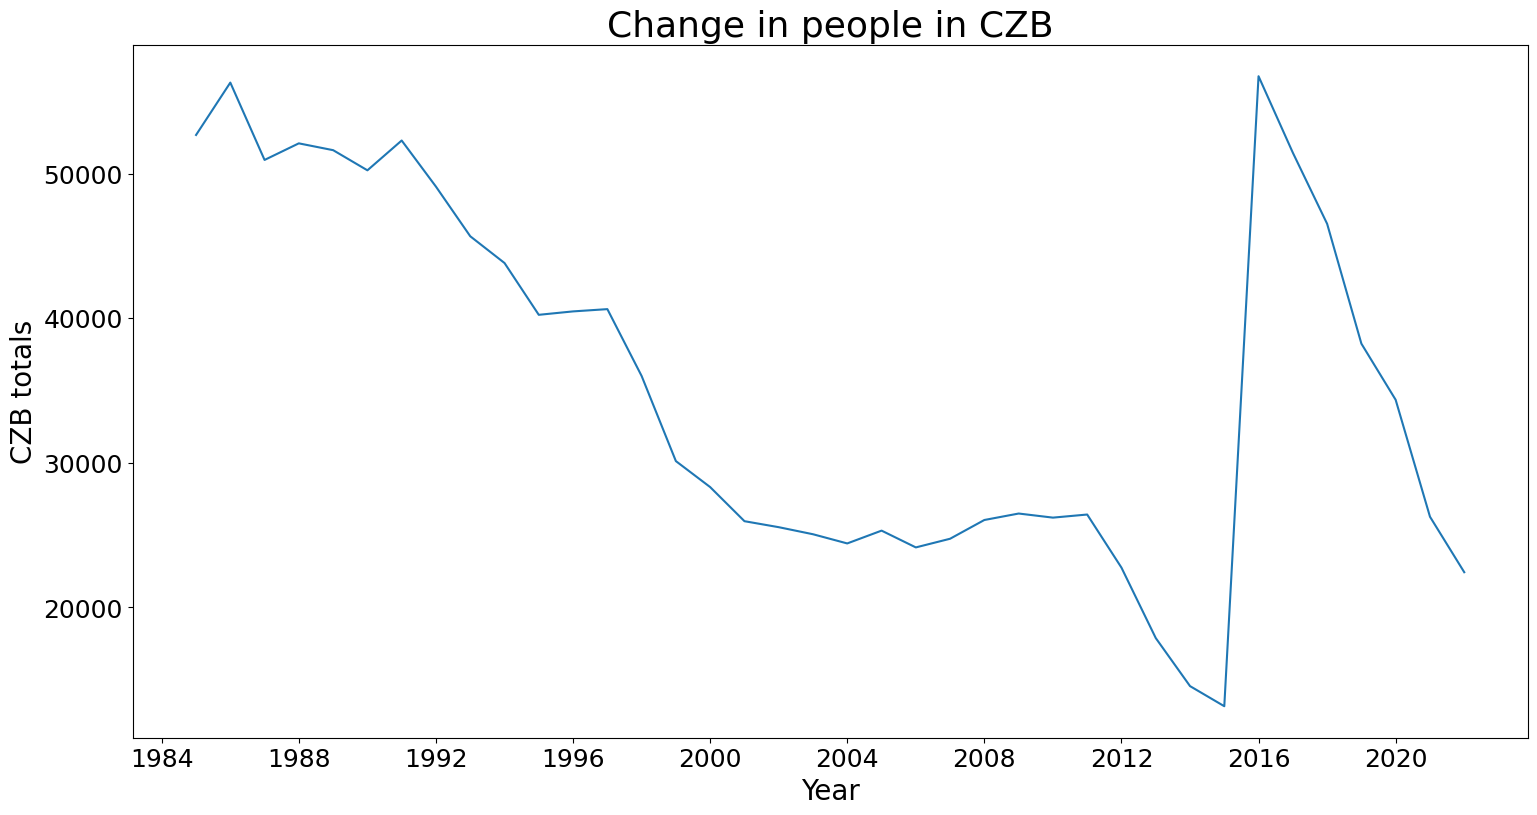

In [158]:
plot_series(czb_ts, cols=['v_b'], title = 'Change in people in CZB', xlab = 'Year', ylab = 'CZB totals') 

### CZH

In [39]:
df_CZH = df_CZH.drop(columns=['p', 'se', 'g', 'l', 'a'])
df_CZH.head()

,d,v
0,2018-2022,2.668703
1,2018-2022,0.329276
2,2018-2022,0.676879
3,2018-2022,0.461857
4,2018-2022,0.900524


In [40]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZH)):
    if len(df_CZH['d'][i]) > 4:
        df_CZH.drop(i, inplace=True)

In [41]:
df_CZH.reset_index(inplace=True)

In [42]:
df_CZH['d'].value_counts()

2020    935
2019    935
2018    935
2017    935
2016    935
2021    498
2022    127
1993      1
1998      1
1997      1
1996      1
1995      1
1994      1
1990      1
1992      1
1991      1
2000      1
1989      1
1988      1
1987      1
1986      1
1999      1
2003      1
2001      1
2002      1
2004      1
2005      1
2006      1
2007      1
2008      1
2009      1
2010      1
2011      1
2012      1
2013      1
2014      1
2015      1
1985      1
Name: d, dtype: int64

In [43]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZH)):
    if df_CZH['d'][i] == '2022':
        t_2022 += df_CZH['v'][i]
    elif df_CZH['d'][i] == '2021':
        t_2021 += df_CZH['v'][i]
    elif df_CZH['d'][i] == '2020':
        t_2020 += df_CZH['v'][i]
    elif df_CZH['d'][i] == '2019':
        t_2019 += df_CZH['v'][i]
    elif df_CZH['d'][i] == '2018':
        t_2018 += df_CZH['v'][i]
    elif df_CZH['d'][i] == '2017':
        t_2017 += df_CZH['v'][i]
    elif df_CZH['d'][i] == '2016':
        t_2016 += df_CZH['v'][i]

In [44]:
czh_ts = pd.DataFrame()
czh_ts = df_CZH

In [45]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czh_ts)):
    if czh_ts['d'][i] == '2022':
        czh_ts.drop(i, inplace=True)
    elif czh_ts['d'][i] == '2021':
        czh_ts.drop(i, inplace=True)
    elif czh_ts['d'][i] == '2020':
        czh_ts.drop(i, inplace=True)
    elif czh_ts['d'][i] == '2019':
        czh_ts.drop(i, inplace=True)
    elif czh_ts['d'][i] == '2018':
        czh_ts.drop(i, inplace=True)
    elif czh_ts['d'][i] == '2017':
        czh_ts.drop(i, inplace=True)
    elif czh_ts['d'][i] == '2016':
        czh_ts.drop(i, inplace=True)

In [46]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [47]:
czh_ts = czh_ts.append(row_2016, ignore_index=True)
czh_ts = czh_ts.append(row_2017, ignore_index=True)
czh_ts = czh_ts.append(row_2018, ignore_index=True)
czh_ts = czh_ts.append(row_2019, ignore_index=True)
czh_ts = czh_ts.append(row_2020, ignore_index=True)
czh_ts = czh_ts.append(row_2021, ignore_index=True)
czh_ts = czh_ts.append(row_2022, ignore_index=True)

/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/3731378244.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czh_ts = czh_ts.append(row_2016, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/3731378244.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czh_ts = czh_ts.append(row_2017, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/3731378244.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czh_ts = czh_ts.append(row_2018, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/3731378244.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [48]:
#Convert date to datetime
czh_ts['d'] = pd.to_datetime(czh_ts['d'])

In [49]:
czh_ts.set_index('d', inplace = True)
czh_ts.sort_index(inplace=True)
czh_ts.drop(columns=['index'], inplace=True)
czh_ts['v_h'] = czh_ts['v']
czh_ts.drop(columns='v', inplace=True)
czh_ts.head()

,v_h
d,
1985-01-01,666.0
1986-01-01,744.0
1987-01-01,687.0
1988-01-01,660.0
1989-01-01,742.0


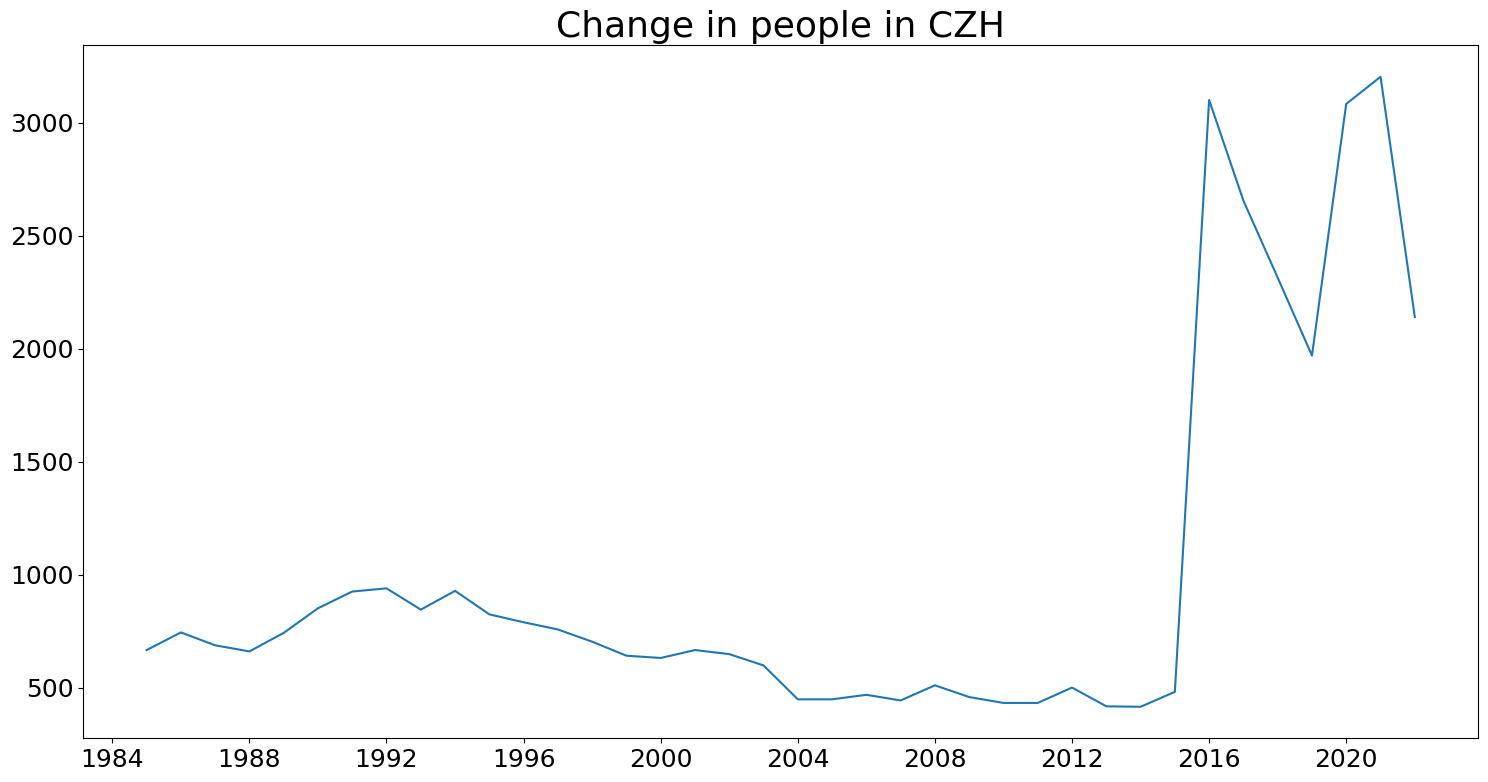

In [233]:
plot_series(czh_ts, cols=['v'], title = 'Change in people in CZH') 

### CZL

In [51]:
df_CZL = df_CZL.drop(columns=['p', 'se', 'g', 'l', 'a'])
df_CZL.head()

,d,v
0,2018-2022,1479.192448
1,2018-2022,243.253990
2,2018-2022,179.016338
3,2018-2022,127.984247
4,2018-2022,430.360853


In [52]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZL)):
    if len(df_CZL['d'][i]) > 4:
        df_CZL.drop(i, inplace=True)

In [53]:
df_CZL.reset_index(inplace=True)
df_CZL['d'].value_counts()

2021    937
2020    935
2019    935
2018    935
2017    935
2016    935
2022    136
1993      1
1998      1
1997      1
1996      1
1995      1
1994      1
1990      1
1992      1
1991      1
2000      1
1989      1
1988      1
1987      1
1986      1
1999      1
2003      1
2001      1
2002      1
2004      1
2005      1
2006      1
2007      1
2008      1
2009      1
2010      1
2011      1
2012      1
2013      1
2014      1
2015      1
1985      1
Name: d, dtype: int64

In [54]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZL)):
    if df_CZL['d'][i] == '2022':
        t_2022 += df_CZL['v'][i]
    elif df_CZL['d'][i] == '2021':
        t_2021 += df_CZL['v'][i]
    elif df_CZL['d'][i] == '2020':
        t_2020 += df_CZL['v'][i]
    elif df_CZL['d'][i] == '2019':
        t_2019 += df_CZL['v'][i]
    elif df_CZL['d'][i] == '2018':
        t_2018 += df_CZL['v'][i]
    elif df_CZL['d'][i] == '2017':
        t_2017 += df_CZL['v'][i]
    elif df_CZL['d'][i] == '2016':
        t_2016 += df_CZL['v'][i]

In [55]:
czl_ts = pd.DataFrame()
czl_ts = df_CZL

In [56]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czl_ts)):
    if czl_ts['d'][i] == '2022':
        czl_ts.drop(i, inplace=True)
    elif czl_ts['d'][i] == '2021':
        czl_ts.drop(i, inplace=True)
    elif czl_ts['d'][i] == '2020':
        czl_ts.drop(i, inplace=True)
    elif czl_ts['d'][i] == '2019':
        czl_ts.drop(i, inplace=True)
    elif czl_ts['d'][i] == '2018':
        czl_ts.drop(i, inplace=True)
    elif czl_ts['d'][i] == '2017':
        czl_ts.drop(i, inplace=True)
    elif czl_ts['d'][i] == '2016':
        czl_ts.drop(i, inplace=True)

In [57]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [58]:
czl_ts = czl_ts.append(row_2016, ignore_index=True)
czl_ts = czl_ts.append(row_2017, ignore_index=True)
czl_ts = czl_ts.append(row_2018, ignore_index=True)
czl_ts = czl_ts.append(row_2019, ignore_index=True)
czl_ts = czl_ts.append(row_2020, ignore_index=True)
czl_ts = czl_ts.append(row_2021, ignore_index=True)
czl_ts = czl_ts.append(row_2022, ignore_index=True)

/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/4157697202.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czl_ts = czl_ts.append(row_2016, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/4157697202.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czl_ts = czl_ts.append(row_2017, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/4157697202.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czl_ts = czl_ts.append(row_2018, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/4157697202.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [59]:
#Convert date to datetime
czl_ts['d'] = pd.to_datetime(czl_ts['d'])

In [60]:
czl_ts.set_index('d', inplace = True)
czl_ts.sort_index(inplace=True)
czl_ts.drop(columns=['index'], inplace=True)
czl_ts['v_l'] = czl_ts['v']
czl_ts.drop(columns='v', inplace=True)
czl_ts.head()

,v_l
d,
1985-01-01,122389.0
1986-01-01,122819.0
1987-01-01,119926.0
1988-01-01,129484.0
1989-01-01,131311.0


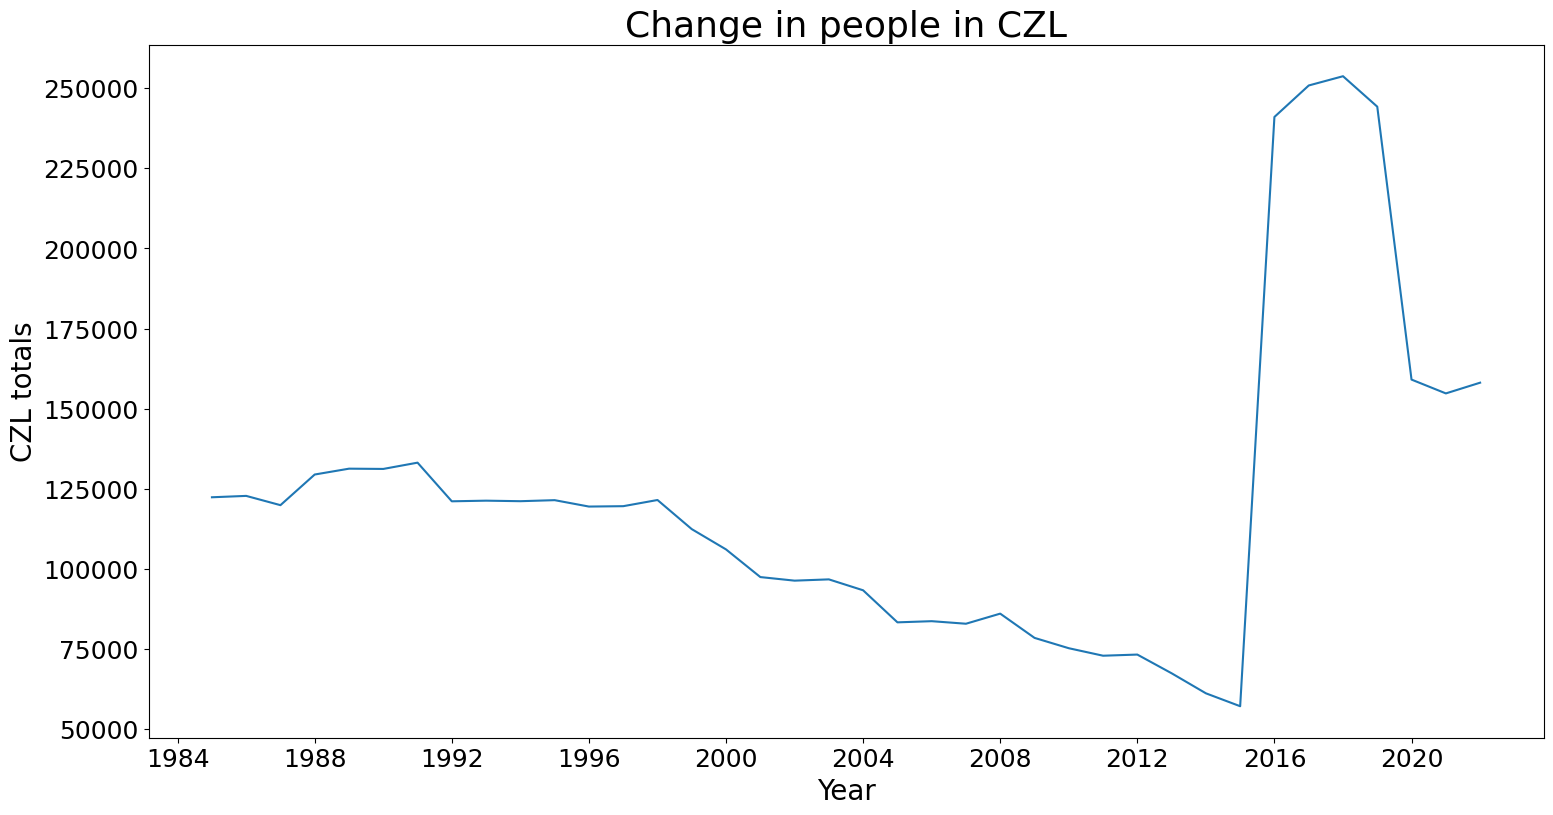

In [159]:
plot_series(czl_ts, cols=['v_l'], title = 'Change in people in CZL', xlab = 'Year', ylab = 'CZL totals') 

### CZO

In [62]:
df_CZO = df_CZO.drop(columns=['p', 'se', 'g', 'l', 'a'])
df_CZO.head()

,d,v
0,2018-2022,2.336624
1,2018-2022,0.407830
2,2018-2022,0.801142
3,2018-2022,0.559461
4,2018-2022,1.278869


In [63]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZO)):
    if len(df_CZO['d'][i]) > 4:
        df_CZO.drop(i, inplace=True)

In [64]:
df_CZO.reset_index(inplace=True)
df_CZO.drop(columns='index', inplace=True)

In [65]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZO)):
    if df_CZO['d'][i] == '2022':
        t_2022 += df_CZO['v'][i]
    elif df_CZO['d'][i] == '2021':
        t_2021 += df_CZO['v'][i]
    elif df_CZO['d'][i] == '2020':
        t_2020 += df_CZO['v'][i]
    elif df_CZO['d'][i] == '2019':
        t_2019 += df_CZO['v'][i]
    elif df_CZO['d'][i] == '2018':
        t_2018 += df_CZO['v'][i]
    elif df_CZO['d'][i] == '2017':
        t_2017 += df_CZO['v'][i]
    elif df_CZO['d'][i] == '2016':
        t_2016 += df_CZO['v'][i]

In [66]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [67]:
czo_ts = pd.DataFrame()
czo_ts = df_CZO

In [68]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czo_ts)):
    if czo_ts['d'][i] == '2022':
        czo_ts.drop(i, inplace=True)
    elif czo_ts['d'][i] == '2021':
        czo_ts.drop(i, inplace=True)
    elif czo_ts['d'][i] == '2020':
        czo_ts.drop(i, inplace=True)
    elif czo_ts['d'][i] == '2019':
        czo_ts.drop(i, inplace=True)
    elif czo_ts['d'][i] == '2018':
        czo_ts.drop(i, inplace=True)
    elif czo_ts['d'][i] == '2017':
        czo_ts.drop(i, inplace=True)
    elif czo_ts['d'][i] == '2016':
        czo_ts.drop(i, inplace=True)

In [69]:
czo_ts = czo_ts.append(row_2016, ignore_index=True)
czo_ts = czo_ts.append(row_2017, ignore_index=True)
czo_ts = czo_ts.append(row_2018, ignore_index=True)
czo_ts = czo_ts.append(row_2019, ignore_index=True)
czo_ts = czo_ts.append(row_2020, ignore_index=True)
czo_ts = czo_ts.append(row_2021, ignore_index=True)
czo_ts = czo_ts.append(row_2022, ignore_index=True)

/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/3833591017.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czo_ts = czo_ts.append(row_2016, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/3833591017.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czo_ts = czo_ts.append(row_2017, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/3833591017.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czo_ts = czo_ts.append(row_2018, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/3833591017.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [70]:
#Convert date to datetime
czo_ts['d'] = pd.to_datetime(czo_ts['d'])

In [71]:
czo_ts.set_index('d', inplace = True)
czo_ts.sort_index(inplace=True)

In [72]:
czo_ts['v_o'] = czo_ts['v']
czo_ts.drop(columns='v', inplace=True)

In [73]:
czo_ts.head()

,v_o
d,
1985-01-01,2026.0
1986-01-01,2625.0
1987-01-01,2804.0
1988-01-01,2891.0
1989-01-01,2561.0


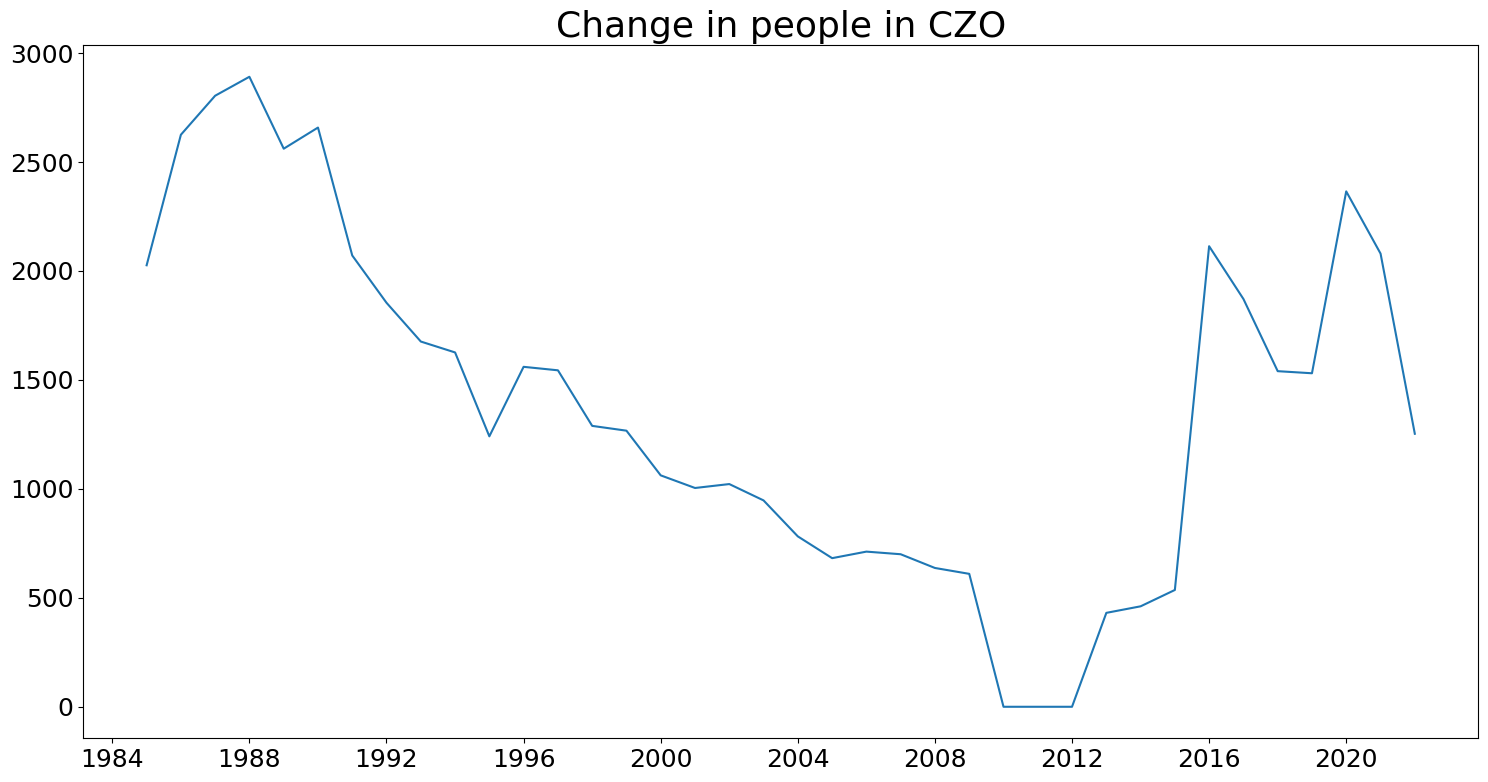

In [74]:
plot_series(czo_ts, cols=['v_o'], title = 'Change in people in CZO') 

### CZP

In [75]:
df_CZP = df_CZP.drop(columns=['p', 'se', 'g', 'l', 'a'])
df_CZP.head()

,d,v
0,2018-2022,1587.862856
1,2018-2022,256.744150
2,2018-2022,194.944386
3,2018-2022,139.291019
4,2018-2022,471.320510


In [76]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZP)):
    if len(df_CZP['d'][i]) > 4:
        df_CZP.drop(i, inplace=True)

In [77]:
df_CZP.reset_index(inplace=True)
df_CZP.drop(columns='index', inplace=True)

In [78]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZP)):
    if df_CZP['d'][i] == '2022':
        t_2022 += df_CZP['v'][i]
    elif df_CZP['d'][i] == '2021':
        t_2021 += df_CZP['v'][i]
    elif df_CZP['d'][i] == '2020':
        t_2020 += df_CZP['v'][i]
    elif df_CZP['d'][i] == '2019':
        t_2019 += df_CZP['v'][i]
    elif df_CZP['d'][i] == '2018':
        t_2018 += df_CZP['v'][i]
    elif df_CZP['d'][i] == '2017':
        t_2017 += df_CZP['v'][i]
    elif df_CZP['d'][i] == '2016':
        t_2016 += df_CZP['v'][i]

In [79]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [80]:
czp_ts = pd.DataFrame()
czp_ts = df_CZP

In [81]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czp_ts)):
    if czp_ts['d'][i] == '2022':
        czp_ts.drop(i, inplace=True)
    elif czp_ts['d'][i] == '2021':
        czp_ts.drop(i, inplace=True)
    elif czp_ts['d'][i] == '2020':
        czp_ts.drop(i, inplace=True)
    elif czp_ts['d'][i] == '2019':
        czp_ts.drop(i, inplace=True)
    elif czp_ts['d'][i] == '2018':
        czp_ts.drop(i, inplace=True)
    elif czp_ts['d'][i] == '2017':
        czp_ts.drop(i, inplace=True)
    elif czp_ts['d'][i] == '2016':
        czp_ts.drop(i, inplace=True)

In [82]:
czp_ts = czp_ts.append(row_2016, ignore_index=True)
czp_ts = czp_ts.append(row_2017, ignore_index=True)
czp_ts = czp_ts.append(row_2018, ignore_index=True)
czp_ts = czp_ts.append(row_2019, ignore_index=True)
czp_ts = czp_ts.append(row_2020, ignore_index=True)
czp_ts = czp_ts.append(row_2021, ignore_index=True)
czp_ts = czp_ts.append(row_2022, ignore_index=True)

/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/1944313996.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czp_ts = czp_ts.append(row_2016, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/1944313996.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czp_ts = czp_ts.append(row_2017, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/1944313996.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czp_ts = czp_ts.append(row_2018, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/1944313996.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [83]:
#Convert date to datetime
czp_ts['d'] = pd.to_datetime(czp_ts['d'])

In [84]:
czp_ts.set_index('d', inplace = True)
czp_ts.sort_index(inplace=True)

In [85]:
czp_ts['v_p'] = czp_ts['v']
czp_ts.drop(columns='v', inplace=True)

In [86]:
czp_ts.head()

,v_p
d,
1985-01-01,219981.0
1986-01-01,227668.0
1987-01-01,210642.0
1988-01-01,226630.0
1989-01-01,228865.0


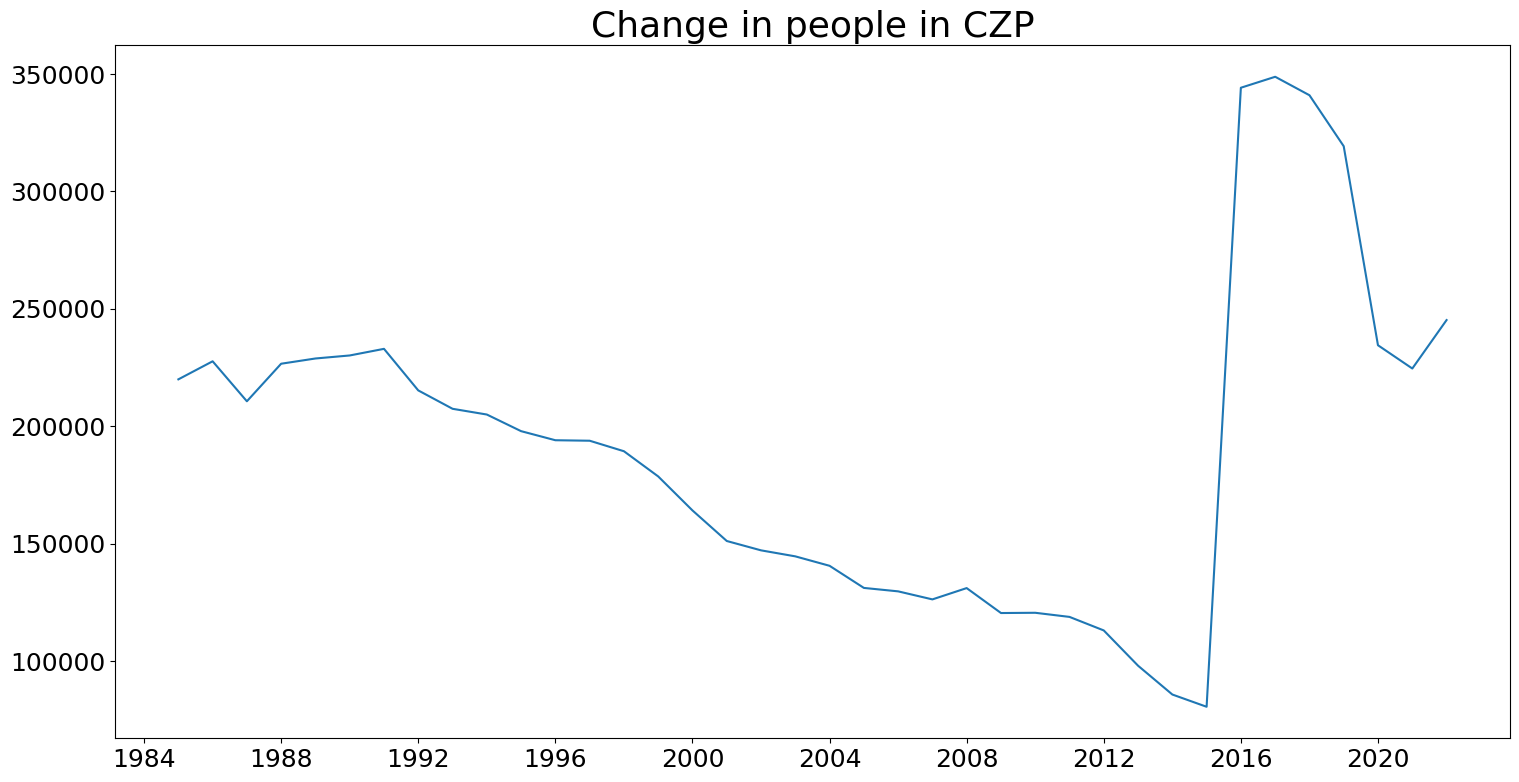

In [87]:
plot_series(czp_ts, cols=['v_p'], title = 'Change in people in CZP') 

### CZR

In [88]:
df_CZR = df_CZR.drop(columns=['p', 'se', 'g', 'l', 'a'])

In [89]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZR)):
    if len(df_CZR['d'][i]) > 4:
        df_CZR.drop(i, inplace=True)

In [90]:
df_CZR.reset_index(inplace=True)
df_CZR.drop(columns='index', inplace=True)

In [91]:
df_CZR.head()

,d,v
0,2022,69.658518
1,2022,11.319564
2,2022,13.590240
3,2022,9.817714
4,2022,36.959017


In [92]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZR)):
    if df_CZR['d'][i] == '2022':
        t_2022 += df_CZR['v'][i]
    elif df_CZR['d'][i] == '2021':
        t_2021 += df_CZR['v'][i]
    elif df_CZR['d'][i] == '2020':
        t_2020 += df_CZR['v'][i]
    elif df_CZR['d'][i] == '2019':
        t_2019 += df_CZR['v'][i]
    elif df_CZR['d'][i] == '2018':
        t_2018 += df_CZR['v'][i]
    elif df_CZR['d'][i] == '2017':
        t_2017 += df_CZR['v'][i]
    elif df_CZR['d'][i] == '2016':
        t_2016 += df_CZR['v'][i]

In [93]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [94]:
czr_ts = pd.DataFrame()
czr_ts = df_CZR

In [95]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czr_ts)):
    if czr_ts['d'][i] == '2022':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2021':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2020':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2019':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2018':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2017':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2016':
        czr_ts.drop(i, inplace=True)

In [96]:
czr_ts = czr_ts.append(row_2016, ignore_index=True)
czr_ts = czr_ts.append(row_2017, ignore_index=True)
czr_ts = czr_ts.append(row_2018, ignore_index=True)
czr_ts = czr_ts.append(row_2019, ignore_index=True)
czr_ts = czr_ts.append(row_2020, ignore_index=True)
czr_ts = czr_ts.append(row_2021, ignore_index=True)
czr_ts = czr_ts.append(row_2022, ignore_index=True)

/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/1357644766.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czr_ts = czr_ts.append(row_2016, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/1357644766.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czr_ts = czr_ts.append(row_2017, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/1357644766.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czr_ts = czr_ts.append(row_2018, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/1357644766.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [97]:
#Convert date to datetime
czr_ts['d'] = pd.to_datetime(czr_ts['d'])
czr_ts.head()

,d,v
0,2015-01-01,9643.0
1,2014-01-01,9804.0
2,2013-01-01,11836.0
3,2012-01-01,13492.0
4,2011-01-01,13988.0


In [98]:
czr_ts.set_index('d', inplace = True)
czr_ts.sort_index(inplace=True)
czr_ts['v_r'] = czr_ts['v']
czr_ts.drop(columns='v', inplace=True)

In [99]:
czr_ts.head()

,v_r
d,
1985-01-01,26910.0
1986-01-01,30927.0
1987-01-01,29836.0
1988-01-01,28987.0
1989-01-01,31600.0


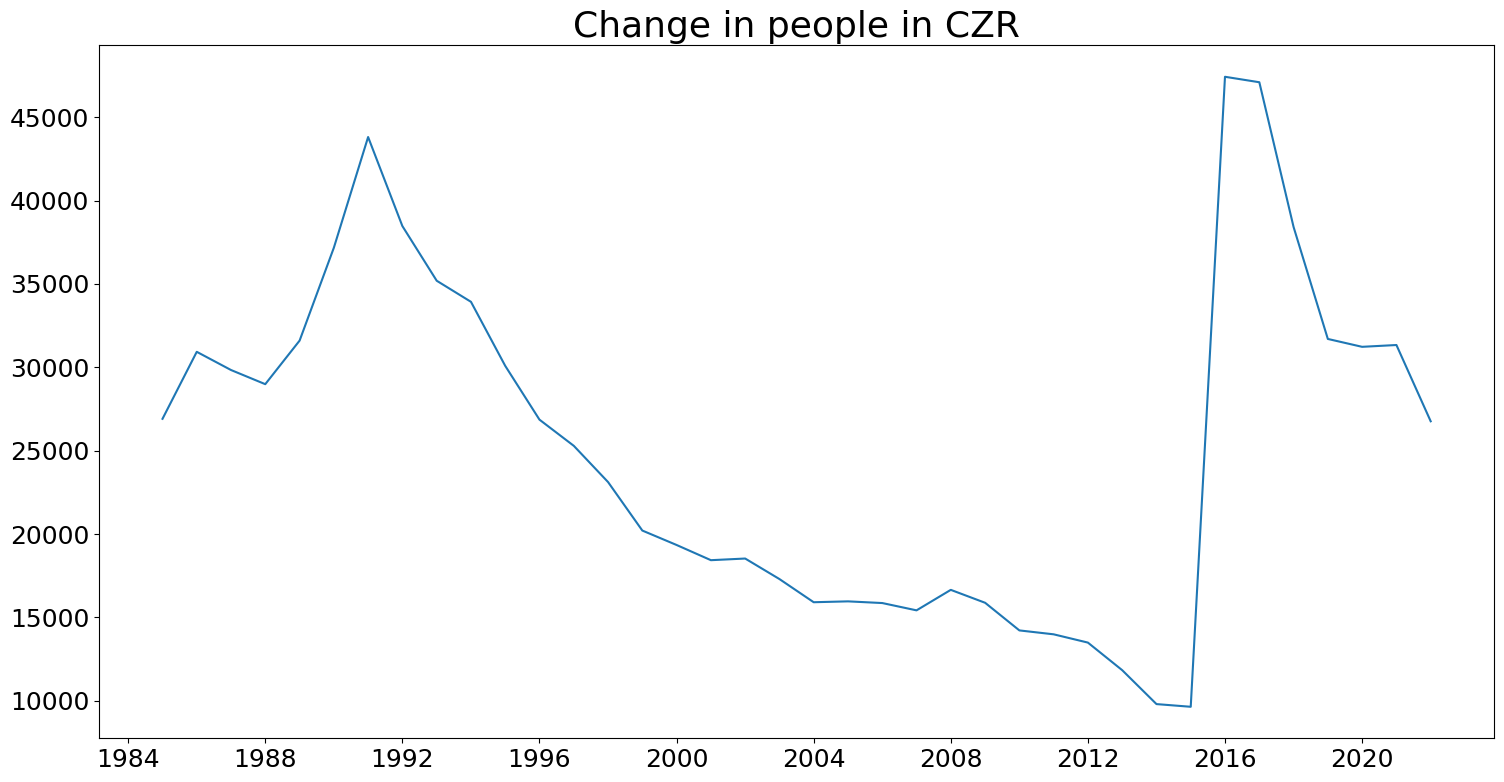

In [100]:
plot_series(czr_ts, cols=['v_r'], title = 'Change in people in CZR') 

In [101]:
df_CZS = df_CZS.drop(columns=['p', 'se', 'g', 'l', 'a'])
df_CZS.head()

,d,v
0,2018-2022,14.792208
1,2018-2022,2.535577
2,2018-2022,1.980776
3,2018-2022,1.379017
4,2018-2022,3.431289


In [102]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZS)):
    if len(df_CZS['d'][i]) > 4:
        df_CZS.drop(i, inplace=True)

In [103]:
df_CZS.reset_index(inplace=True)
df_CZS.drop(columns='index', inplace=True)

In [104]:
df_CZS.head()

,d,v
0,2022,13.773353
1,2022,2.085822
2,2022,1.615953
3,2022,1.158961
4,2022,4.442106


In [105]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZS)):
    if df_CZS['d'][i] == '2022':
        t_2022 += df_CZS['v'][i]
    elif df_CZS['d'][i] == '2021':
        t_2021 += df_CZS['v'][i]
    elif df_CZS['d'][i] == '2020':
        t_2020 += df_CZS['v'][i]
    elif df_CZS['d'][i] == '2019':
        t_2019 += df_CZS['v'][i]
    elif df_CZS['d'][i] == '2018':
        t_2018 += df_CZS['v'][i]
    elif df_CZS['d'][i] == '2017':
        t_2017 += df_CZS['v'][i]
    elif df_CZS['d'][i] == '2016':
        t_2016 += df_CZS['v'][i]

In [106]:
czs_ts = pd.DataFrame()
czs_ts = df_CZS
czs_ts.head()

,d,v
0,2022,13.773353
1,2022,2.085822
2,2022,1.615953
3,2022,1.158961
4,2022,4.442106


In [107]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czs_ts)):
    if czs_ts['d'][i] == '2022':
        czs_ts.drop(i, inplace=True)
    elif czs_ts['d'][i] == '2021':
        czs_ts.drop(i, inplace=True)
    elif czs_ts['d'][i] == '2020':
        czs_ts.drop(i, inplace=True)
    elif czs_ts['d'][i] == '2019':
        czs_ts.drop(i, inplace=True)
    elif czs_ts['d'][i] == '2018':
        czs_ts.drop(i, inplace=True)
    elif czs_ts['d'][i] == '2017':
        czs_ts.drop(i, inplace=True)
    elif czs_ts['d'][i] == '2016':
        czs_ts.drop(i, inplace=True)

In [108]:
czs_ts.head()

,d,v
5542,2015,1483.0
5543,2014,1389.0
5544,2013,0.0
5545,2012,0.0
5546,2011,0.0


In [109]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [110]:
czr_ts = czr_ts.append(row_2016, ignore_index=True)
czr_ts = czr_ts.append(row_2017, ignore_index=True)
czr_ts = czr_ts.append(row_2018, ignore_index=True)
czr_ts = czr_ts.append(row_2019, ignore_index=True)
czr_ts = czr_ts.append(row_2020, ignore_index=True)
czr_ts = czr_ts.append(row_2021, ignore_index=True)
czr_ts = czr_ts.append(row_2022, ignore_index=True)

/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/1357644766.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czr_ts = czr_ts.append(row_2016, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/1357644766.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czr_ts = czr_ts.append(row_2017, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/1357644766.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czr_ts = czr_ts.append(row_2018, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/1357644766.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [111]:
czs_ts.set_index('d', inplace = True)
czs_ts.sort_index(inplace=True)
czs_ts['v_s'] = czs_ts['v']
czs_ts.drop(columns='v', inplace=True)

In [112]:
czs_ts.head()

,v_s
d,
1985,0.0
1986,0.0
1987,0.0
1988,0.0
1989,0.0


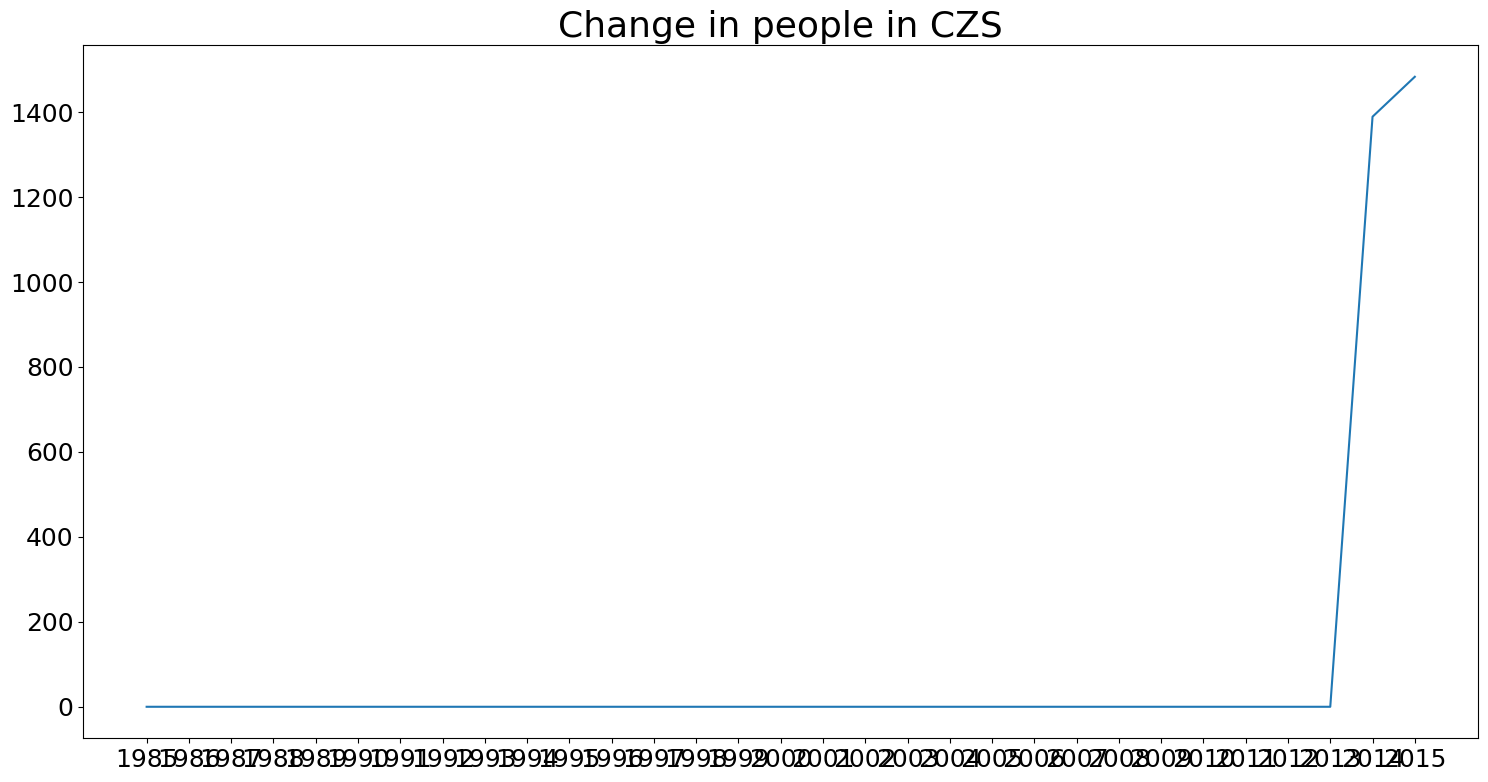

In [113]:
plot_series(czs_ts, cols=['v_s'], title = 'Change in people in CZS') 

### CZT

In [114]:
df_CZT = df_CZT.drop(columns=['p', 'se', 'g', 'l', 'a'])
df_CZT.head()

,d,v
0,2018-2022,72.947507
1,2018-2022,7.922559
2,2018-2022,9.008140
3,2018-2022,6.410191
4,2018-2022,23.904848


In [115]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZT)):
    if len(df_CZT['d'][i]) > 4:
        df_CZT.drop(i, inplace=True)

In [116]:
df_CZT.reset_index(inplace=True)
df_CZT.drop(columns='index', inplace=True)

In [117]:
df_CZT.head()

,d,v
0,2022,140.520040
1,2022,14.690843
2,2022,15.331254
3,2022,10.907071
4,2022,41.691920


In [118]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZT)):
    if df_CZT['d'][i] == '2022':
        t_2022 += df_CZT['v'][i]
    elif df_CZT['d'][i] == '2021':
        t_2021 += df_CZT['v'][i]
    elif df_CZT['d'][i] == '2020':
        t_2020 += df_CZT['v'][i]
    elif df_CZT['d'][i] == '2019':
        t_2019 += df_CZT['v'][i]
    elif df_CZT['d'][i] == '2018':
        t_2018 += df_CZT['v'][i]
    elif df_CZT['d'][i] == '2017':
        t_2017 += df_CZT['v'][i]
    elif df_CZT['d'][i] == '2016':
        t_2016 += df_CZT['v'][i]

In [119]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [120]:
czt_ts = pd.DataFrame()
czt_ts = df_CZT

In [121]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czt_ts)):
    if czt_ts['d'][i] == '2022':
        czt_ts.drop(i, inplace=True)
    elif czt_ts['d'][i] == '2021':
        czt_ts.drop(i, inplace=True)
    elif czt_ts['d'][i] == '2020':
        czt_ts.drop(i, inplace=True)
    elif czt_ts['d'][i] == '2019':
        czt_ts.drop(i, inplace=True)
    elif czt_ts['d'][i] == '2018':
        czt_ts.drop(i, inplace=True)
    elif czt_ts['d'][i] == '2017':
        czt_ts.drop(i, inplace=True)
    elif czt_ts['d'][i] == '2016':
        czt_ts.drop(i, inplace=True)

In [122]:
czt_ts = czt_ts.append(row_2016, ignore_index=True)
czt_ts = czt_ts.append(row_2017, ignore_index=True)
czt_ts = czt_ts.append(row_2018, ignore_index=True)
czt_ts = czt_ts.append(row_2019, ignore_index=True)
czt_ts = czt_ts.append(row_2020, ignore_index=True)
czt_ts = czt_ts.append(row_2021, ignore_index=True)
czt_ts = czt_ts.append(row_2022, ignore_index=True)

/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/2456641814.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czt_ts = czt_ts.append(row_2016, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/2456641814.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czt_ts = czt_ts.append(row_2017, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/2456641814.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czt_ts = czt_ts.append(row_2018, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/2456641814.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [123]:
#Convert date to datetime
czt_ts['d'] = pd.to_datetime(czt_ts['d'])
czt_ts.head()

,d,v
0,2015-01-01,10200.0
1,2014-01-01,10002.0
2,2013-01-01,12690.0
3,2012-01-01,17005.0
4,2011-01-01,19451.0


In [124]:
czt_ts.set_index('d', inplace = True)
czt_ts.sort_index(inplace= True)
czt_ts['v_t'] = czt_ts['v']
czt_ts.drop(columns='v', inplace=True)

In [125]:
czt_ts.head()

,v_t
d,
1985-01-01,44915.0
1986-01-01,48550.0
1987-01-01,39766.0
1988-01-01,45049.0
1989-01-01,45929.0


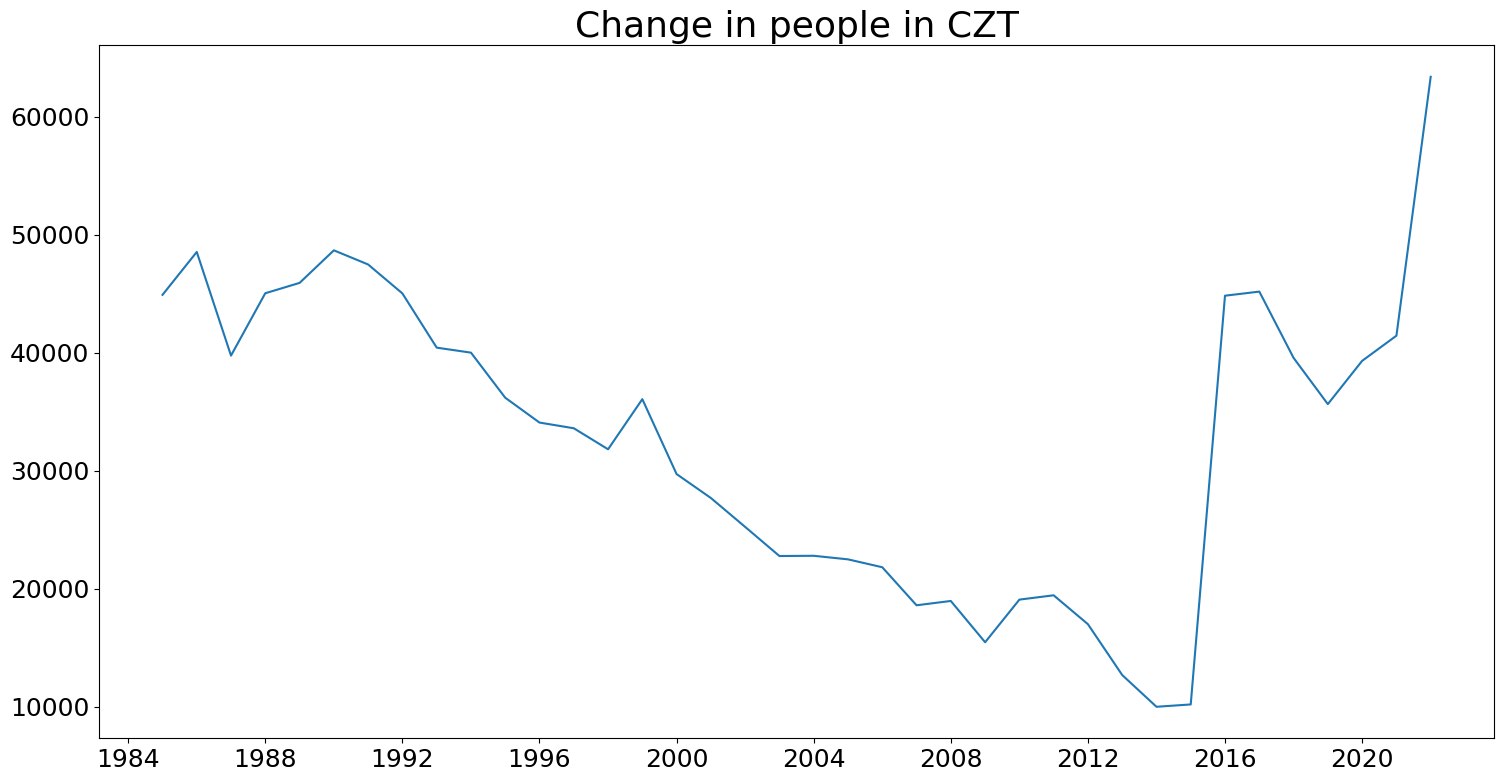

In [126]:
plot_series(czt_ts, cols=['v_t'], title = 'Change in people in CZT')

### CZV

In [127]:
df_CZV = df_CZV.drop(columns=['p', 'se', 'g', 'l', 'a'])
df_CZV.head()

,d,v
0,2018-2022,148.832259
1,2018-2022,25.283188
2,2018-2022,27.331428
3,2018-2022,19.368454
4,2018-2022,58.407745


In [128]:
df_CZV['d'].value_counts()

2021         937
2006-2010    937
2010-2014    936
2004-2008    936
2009-2013    936
            ... 
2002           1
1997-2001      1
2001           1
1996-2000      1
1985           1
Name: d, Length: 71, dtype: int64

In [129]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZV)):
    if len(df_CZV['d'][i]) > 4:
        df_CZV.drop(i, inplace=True)

In [130]:
df_CZV.reset_index(inplace=True)
df_CZV.drop(columns='index', inplace=True)

In [131]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZV)):
    if df_CZV['d'][i] == '2022':
        t_2022 += df_CZV['v'][i]
    elif df_CZV['d'][i] == '2021':
        t_2021 += df_CZV['v'][i]
    elif df_CZV['d'][i] == '2020':
        t_2020 += df_CZV['v'][i]
    elif df_CZV['d'][i] == '2019':
        t_2019 += df_CZV['v'][i]
    elif df_CZV['d'][i] == '2018':
        t_2018 += df_CZV['v'][i]
    elif df_CZV['d'][i] == '2017':
        t_2017 += df_CZV['v'][i]
    elif df_CZV['d'][i] == '2016':
        t_2016 += df_CZV['v'][i]

In [132]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [133]:
czv_ts = pd.DataFrame()
czv_ts = df_CZV

In [134]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czv_ts)):
    if czv_ts['d'][i] == '2022':
        czv_ts.drop(i, inplace=True)
    elif czv_ts['d'][i] == '2021':
        czv_ts.drop(i, inplace=True)
    elif czv_ts['d'][i] == '2020':
        czv_ts.drop(i, inplace=True)
    elif czv_ts['d'][i] == '2019':
        czv_ts.drop(i, inplace=True)
    elif czv_ts['d'][i] == '2018':
        czv_ts.drop(i, inplace=True)
    elif czv_ts['d'][i] == '2017':
        czv_ts.drop(i, inplace=True)
    elif czv_ts['d'][i] == '2016':
        czv_ts.drop(i, inplace=True)

In [135]:
czv_ts = czv_ts.append(row_2016, ignore_index=True)
czv_ts = czv_ts.append(row_2017, ignore_index=True)
czv_ts = czv_ts.append(row_2018, ignore_index=True)
czv_ts = czv_ts.append(row_2019, ignore_index=True)
czv_ts = czv_ts.append(row_2020, ignore_index=True)
czv_ts = czv_ts.append(row_2021, ignore_index=True)
czv_ts = czv_ts.append(row_2022, ignore_index=True)

/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/3804623703.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czv_ts = czv_ts.append(row_2016, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/3804623703.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czv_ts = czv_ts.append(row_2017, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/3804623703.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czv_ts = czv_ts.append(row_2018, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/3804623703.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [136]:
#Convert date to datetime
czv_ts['d'] = pd.to_datetime(czv_ts['d'])
czv_ts.head()

,d,v
0,2015-01-01,24701.0
1,2014-01-01,24140.0
2,2013-01-01,25710.0
3,2012-01-01,26271.0
4,2011-01-01,26829.0


In [137]:
czv_ts.set_index('d', inplace = True)
czv_ts.sort_index(inplace= True)
czv_ts['v_v'] = czv_ts['v']
czv_ts.drop(columns='v', inplace=True)

In [138]:
czv_ts.head()

,v_v
d,
1985-01-01,58474.0
1986-01-01,65208.0
1987-01-01,64703.0
1988-01-01,65641.0
1989-01-01,69963.0


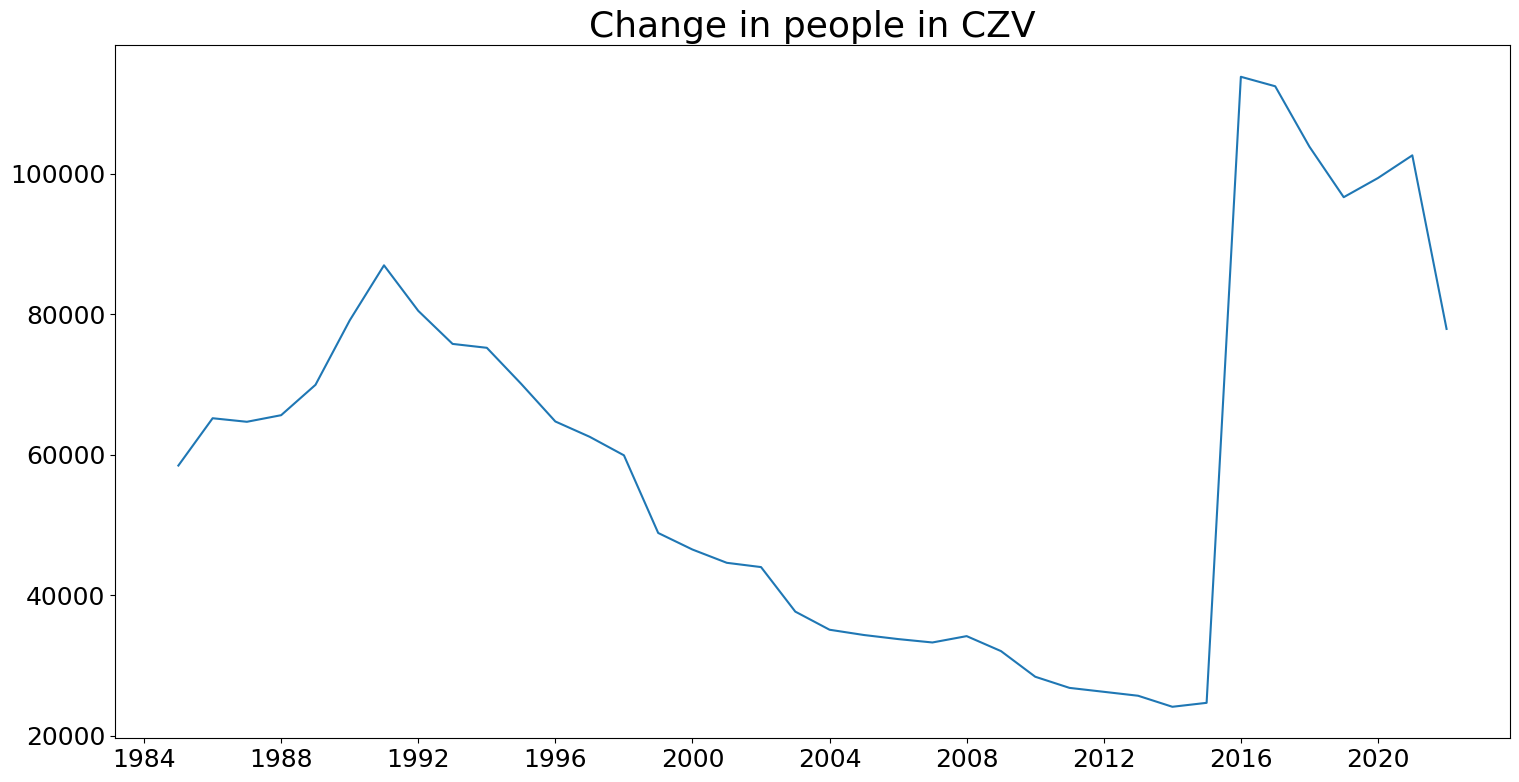

In [139]:
plot_series(czv_ts, cols=['v_v'], title = 'Change in people in CZV')

In [140]:
df_CZU = df_CZU.drop(columns=['p', 'se', 'g', 'l', 'a'])
len(df_CZU)

10535

In [141]:
#Making a new dataframe, removing dates with ranges
for i in range(0, len(df_CZU)):
    if len(df_CZU['d'][i]) > 4:
        df_CZU.drop(i, inplace=True)

In [142]:
df_CZU.reset_index(inplace=True)
df_CZU.drop(columns='index', inplace=True)

In [143]:
#Looping to take the sum of each year
t_2022 = 0
t_2021 = 0
t_2020 = 0
t_2019 = 0
t_2018 = 0
t_2017 = 0
t_2016 = 0
for i in range(0, len(df_CZU)):
    if df_CZU['d'][i] == '2022':
        t_2022 += df_CZU['v'][i]
    elif df_CZU['d'][i] == '2021':
        t_2021 += df_CZU['v'][i]
    elif df_CZU['d'][i] == '2020':
        t_2020 += df_CZU['v'][i]
    elif df_CZU['d'][i] == '2019':
        t_2019 += df_CZU['v'][i]
    elif df_CZU['d'][i] == '2018':
        t_2018 += df_CZU['v'][i]
    elif df_CZU['d'][i] == '2017':
        t_2017 += df_CZU['v'][i]
    elif df_CZU['d'][i] == '2016':
        t_2016 += df_CZU['v'][i]

In [144]:
df_CZU['d'].value_counts()

Series([], Name: d, dtype: int64)

In [145]:
row_2016 = {'d': '2016', 'v': t_2016}
row_2017 = {'d': '2017', 'v': t_2017}
row_2018 = {'d': '2018', 'v': t_2018}
row_2019 = {'d': '2019', 'v': t_2019}
row_2020 = {'d': '2020', 'v': t_2020}
row_2021 = {'d': '2021', 'v': t_2021}
row_2022 = {'d': '2022', 'v': t_2022}

In [146]:
czu_ts = pd.DataFrame()
czu_ts = df_CZU

In [147]:
#Gets rid of dates that were multiples, to later be replaced by a sum
for i in range(0, len(czr_ts)):
    if czr_ts['d'][i] == '2022':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2021':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2020':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2019':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2018':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2017':
        czr_ts.drop(i, inplace=True)
    elif czr_ts['d'][i] == '2016':
        czr_ts.drop(i, inplace=True)

In [148]:
czu_ts = czu_ts.append(row_2016, ignore_index=True)
czu_ts = czu_ts.append(row_2017, ignore_index=True)
czu_ts = czu_ts.append(row_2018, ignore_index=True)
czu_ts = czu_ts.append(row_2019, ignore_index=True)
czu_ts = czu_ts.append(row_2020, ignore_index=True)
czu_ts = czu_ts.append(row_2021, ignore_index=True)
czu_ts = czu_ts.append(row_2022, ignore_index=True)

/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/4045142562.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czu_ts = czu_ts.append(row_2016, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/4045142562.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czu_ts = czu_ts.append(row_2017, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/4045142562.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  czu_ts = czu_ts.append(row_2018, ignore_index=True)
/var/folders/pr/ffd0v18136d92642k7xbzgb80000gn/T/ipykernel_45895/4045142562.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [149]:
czu_ts.set_index('d', inplace = True)
czu_ts.sort_index(inplace=True)
czu_ts['v_s'] = czu_ts['v']
czu_ts.drop(columns='v', inplace=True)

In [150]:
len(czu_ts)

7

## VAR - Exporting Data for TS Modeling

In [151]:
test_VAR = pd.concat([cza_ts, czb_ts, czh_ts, czl_ts, czo_ts, czp_ts, czt_ts, czv_ts], axis=1)

In [152]:
test_VAR.to_csv('../data/ts_combined.csv')

In [161]:
#Log version
test_VAR_log = pd.concat([np.log(cza_ts), np.log(czb_ts), np.log(czh_ts), np.log(czl_ts), np.log(czo_ts), np.log(czp_ts), np.log(czt_ts), np.log(czv_ts)], axis=1)

/Users/connorphillips/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [163]:
test_VAR_log.to_csv('../data/ts_combined_log.csv')